In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_znn824 = pd.read_csv('/content/drive/MyDrive/Transliquidos/Colab/Historical_locations_ZNN824.csv')

In [ ]:
df_znn824.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12947 entries, 0 to 12946
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sequence     12947 non-null  int64  
 1   Unit         12947 non-null  object 
 2   Events       12947 non-null  object 
 3   Date         12947 non-null  object 
 4   Landmark     734 non-null    object 
 5   Address      12935 non-null  object 
 6   Speed        12947 non-null  int64  
 7   Temperature  0 non-null      float64
 8   Driver       0 non-null      float64
 9   Latitude     12947 non-null  float64
 10  Longitude    12947 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [ ]:
df_znn824_filter1=df_znn824[['Unit','Events','Date','Landmark']]
df_znn824_filter1

,Unit,Events,Date,Landmark
0,ZNN824,Idle Alert,Sep 27 2024 02:48 PM,NaN
1,ZNN824,Idle - Stop,Sep 27 2024 02:46 PM,NaN
2,ZNN824,Travel Stop,Sep 27 2024 02:43 PM,NaN
3,ZNN824,Travel Start,Sep 27 2024 02:42 PM,NaN
4,ZNN824,Idle Alert,Sep 27 2024 02:31 PM,NaN
...,...,...,...,...
12942,ZNN824,Idle - Stop,Jul 30 2024 03:55 AM,NaN
12943,ZNN824,Ignition ON,Jul 30 2024 03:52 AM,NaN
12944,ZNN824,Parked,Jul 30 2024 12:33 AM,NaN
12945,ZNN824,Ignition OFF,Jul 30 2024 12:24 AM,NaN


In [ ]:
df_znn824_geo_land_pu=df_znn824_filter1[
    (df_znn824_filter1['Events']=='Geofence IN')|
    (df_znn824_filter1['Events']=='Geofence OUT')|
    (df_znn824_filter1['Events']=='Landmark IN') |
    (df_znn824_filter1['Events']=='Landmark OUT')|
    (df_znn824_filter1['Events']=='POWER UP')|
    (df_znn824_filter1['Events']=='Ignition ON')]
df_znn824_geo_land_pu

,Unit,Events,Date,Landmark
26,ZNN824,Landmark OUT,Sep 27 2024 02:01 PM,El 41 - La Felisa
29,ZNN824,Landmark IN,Sep 27 2024 02:00 PM,El 41 - La Felisa
106,ZNN824,Landmark OUT,Sep 27 2024 12:31 PM,PC LA PINTADA
109,ZNN824,Landmark IN,Sep 27 2024 12:29 PM,PC LA PINTADA
266,ZNN824,Landmark OUT,Sep 27 2024 11:32 AM,PC SANTA BARBARA
...,...,...,...,...
12652,ZNN824,Landmark IN,Jul 30 2024 06:10 AM,Alto de Minas
12742,ZNN824,Landmark OUT,Jul 30 2024 05:35 AM,PC SANTA BARBARA
12746,ZNN824,Landmark IN,Jul 30 2024 05:34 AM,PC SANTA BARBARA
12943,ZNN824,Ignition ON,Jul 30 2024 03:52 AM,NaN


from matplotlib import pyplot as plt
import seaborn as sns
df_znn824_geo_land_pu.groupby('Events').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_znn824_geo_land_pu.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Events')):
  _plot_series(series, series_name, i)
  fig.legend(title='Events', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [ ]:
df_znn824_geo_land_pu.to_csv('/content/drive/MyDrive/Transliquidos/Colab/df_znn824_geo_land_pu.csv', index=False)

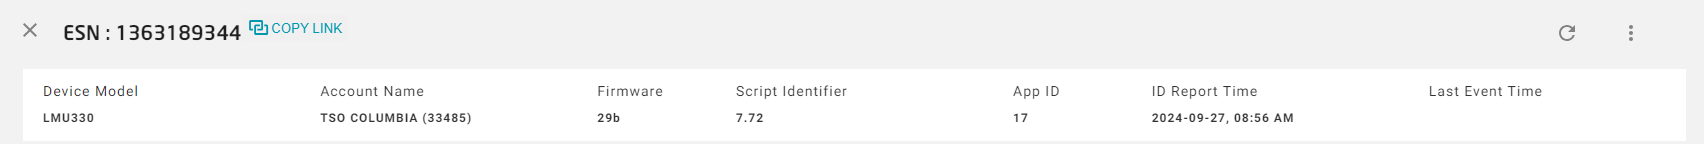

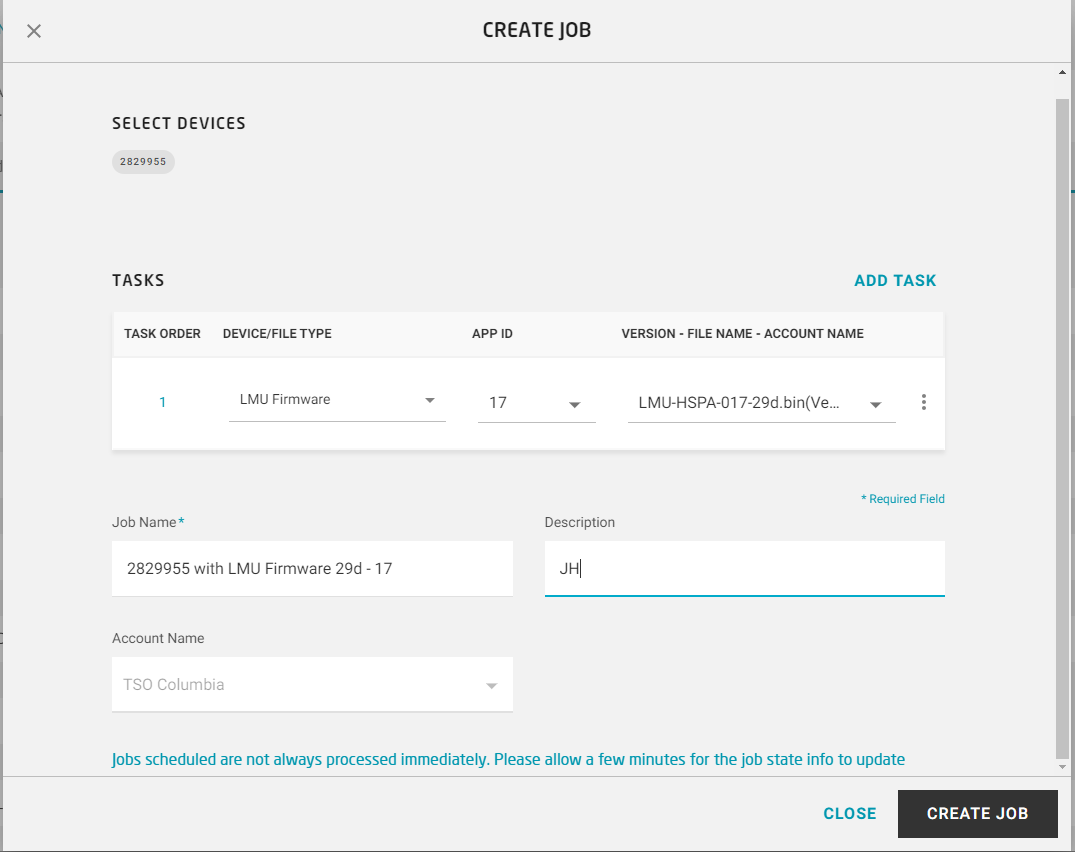

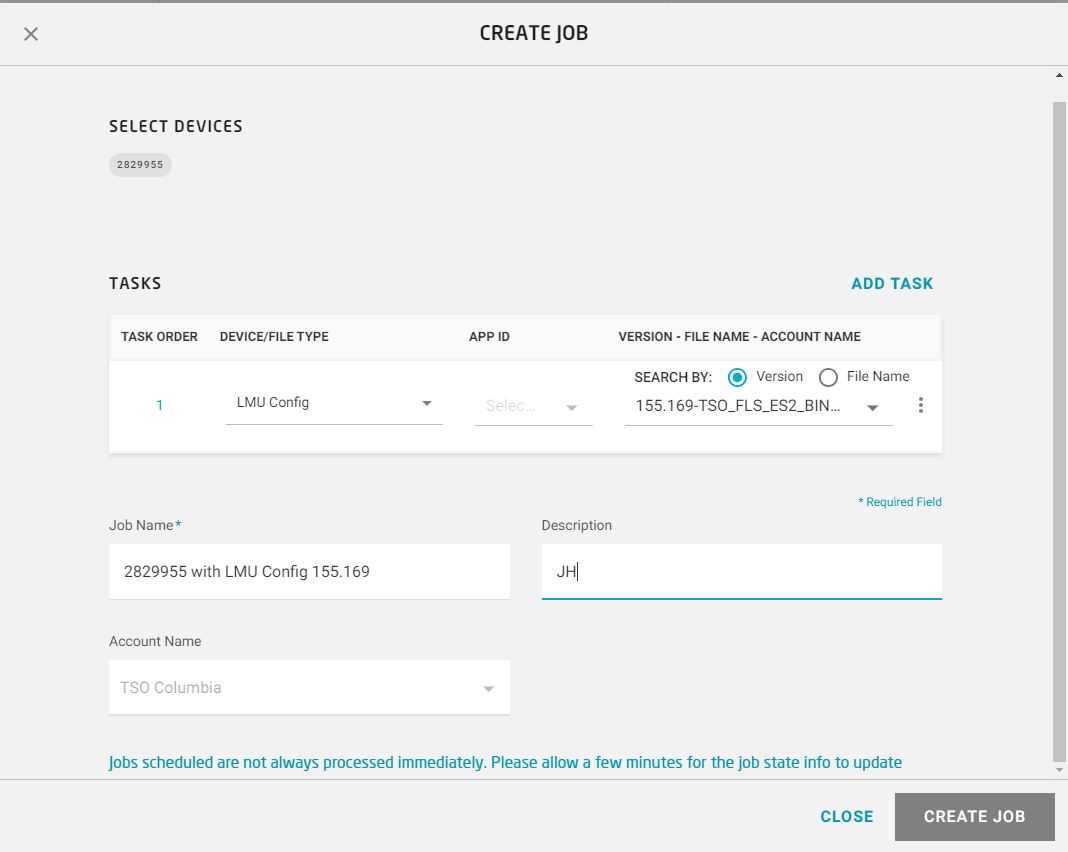

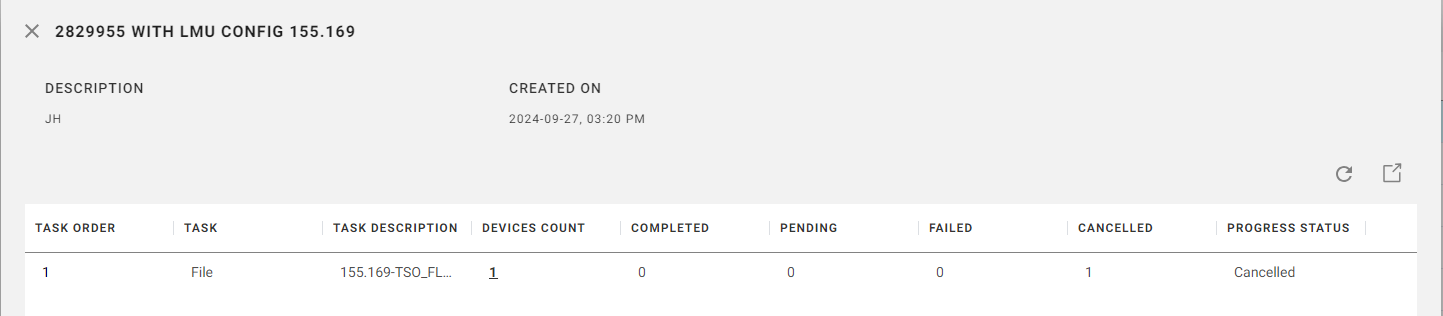

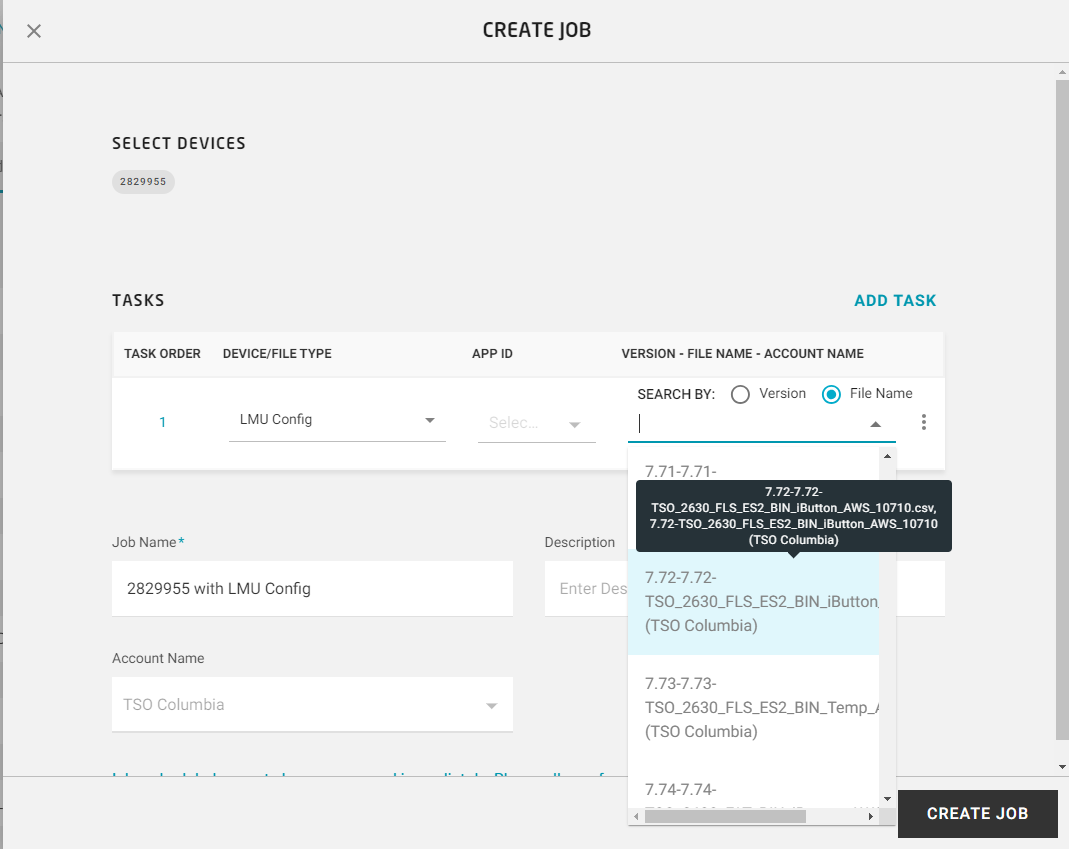

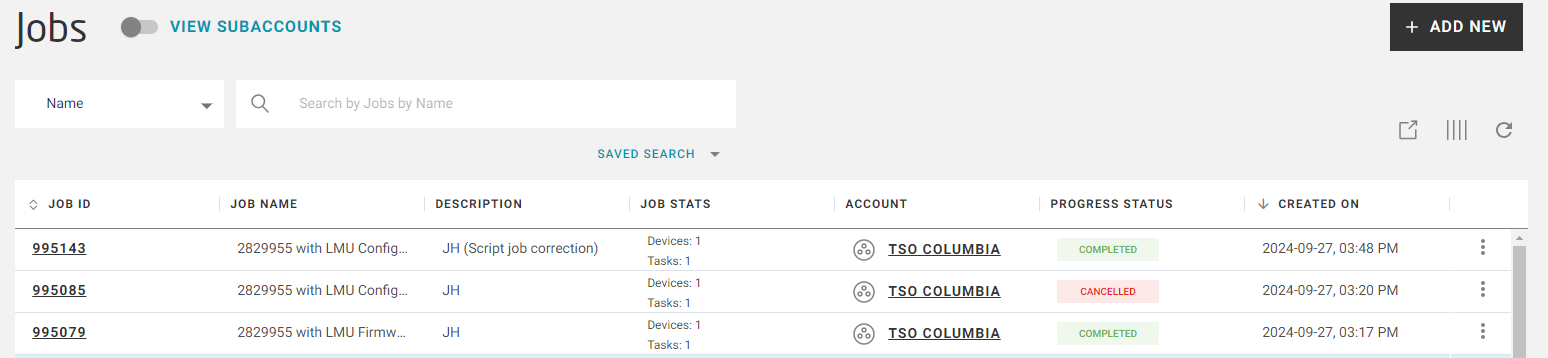